In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
data = pd.read_excel('Kimchi_dataset.xlsx')

In [3]:
data.head()

,Date,Region,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes,Price
0,2018-03-25,Seoul,2321.82,2006.46,1996.46,10.00,0.0,1.71
1,2018-03-18,Seoul,3154.45,2580.60,2577.27,3.33,0.0,1.66
2,2018-03-11,Seoul,2570.52,2209.29,2209.29,0.00,0.0,1.68
3,2018-03-04,Seoul,3851.30,3242.98,3239.65,3.33,0.0,1.48
4,2018-02-25,Seoul,5356.63,4007.48,4007.48,0.00,0.0,1.56


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          648 non-null    datetime64[ns]
 1   Region        648 non-null    object        
 2   Total Volume  647 non-null    float64       
 3   Total Boxes   648 non-null    float64       
 4   Small Boxes   648 non-null    float64       
 5   Large Boxes   648 non-null    float64       
 6   XLarge Boxes  648 non-null    float64       
 7   Price         644 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 40.6+ KB


In [5]:
data.isnull().sum()

Date            0
Region          0
Total Volume    1
Total Boxes     0
Small Boxes     0
Large Boxes     0
XLarge Boxes    0
Price           4
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Volume,647.0,75005.910000,212743.996169,2064.90,9168.7500,17722.27,41172.0950,1814929.97
Total Boxes,648.0,49639.351898,140777.215528,988.45,6724.7125,11860.87,29157.0050,1124621.50
Small Boxes,648.0,40598.748580,115044.249219,284.43,4813.2050,9120.54,25105.7425,944572.50
Large Boxes,648.0,9032.257948,29633.321649,0.00,14.3225,622.72,3289.0350,267818.31
XLarge Boxes,648.0,8.345370,43.304003,0.00,0.0000,0.00,0.0000,510.41
Price,644.0,6.533540,118.516792,1.01,1.4100,1.55,1.7100,3003.00


## Droping the missing value.
There isn't too much missing value so we can drop those values.

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

Date            0
Region          0
Total Volume    0
Total Boxes     0
Small Boxes     0
Large Boxes     0
XLarge Boxes    0
Price           0
dtype: int64

In [9]:
data.Region.unique()

array(['Seoul', 'Incheon', 'deagu', 'Anyang', 'Ulsan', 'Busan', 'Daejon',
       'Jeju', 'Gwangju', 'Gangeung', 'Pyeongchang', 'Andong', 'Asan',
       'Boryeong', 'Chungju', 'Geoje', 'Gimpo', 'Gongju', 'Gunpo',
       'Hanam', 'Jeonju', 'Suwon', 'Taebaek', 'Pyeongtaek', 'Yeoju',
       'Wonju', 'Sangju', 'Miryang', 'Suncheon', 'Iksan', 'Namwon',
       'Siheung', 'Tongyeong', 'Yangju', 'Yangsan', 'Donghae', 'Gyeongju',
       'Gyeryong', 'Gimje', 'Gwangmyeong', 'Icheon'], dtype=object)

There is a column named "Region" have string values. I am going to label it with integer for analysis.

In [10]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(data.Region)
data['Region'] = label_encoder.transform(data.Region)

In [11]:
data.Region.unique()

array([29, 21, 40,  1, 35,  4,  6, 22, 14,  8, 26,  0,  2,  3,  5,  9, 11,
       12, 13, 18, 23, 32, 33, 27, 39, 36, 28, 24, 31, 20, 25, 30, 34, 37,
       38,  7, 16, 17, 10, 15, 19])

## Finding the correlation among the features

In [12]:
correlation = data.corr()

round(correlation, 2)

,Region,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes,Price
Region,1.00,-0.16,-0.17,-0.15,-0.19,-0.14,-0.02
Total Volume,-0.16,1.00,0.99,0.98,0.87,0.50,-0.01
Total Boxes,-0.17,0.99,1.00,0.99,0.89,0.52,-0.01
Small Boxes,-0.15,0.98,0.99,1.00,0.84,0.45,-0.01
Large Boxes,-0.19,0.87,0.89,0.84,1.00,0.73,-0.01
XLarge Boxes,-0.14,0.50,0.52,0.45,0.73,1.00,-0.01
Price,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,1.00


<AxesSubplot:>

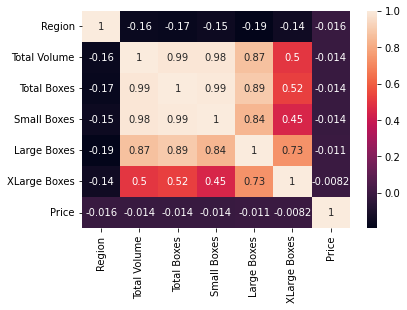

In [13]:
sb.heatmap(data.corr(), annot = True)

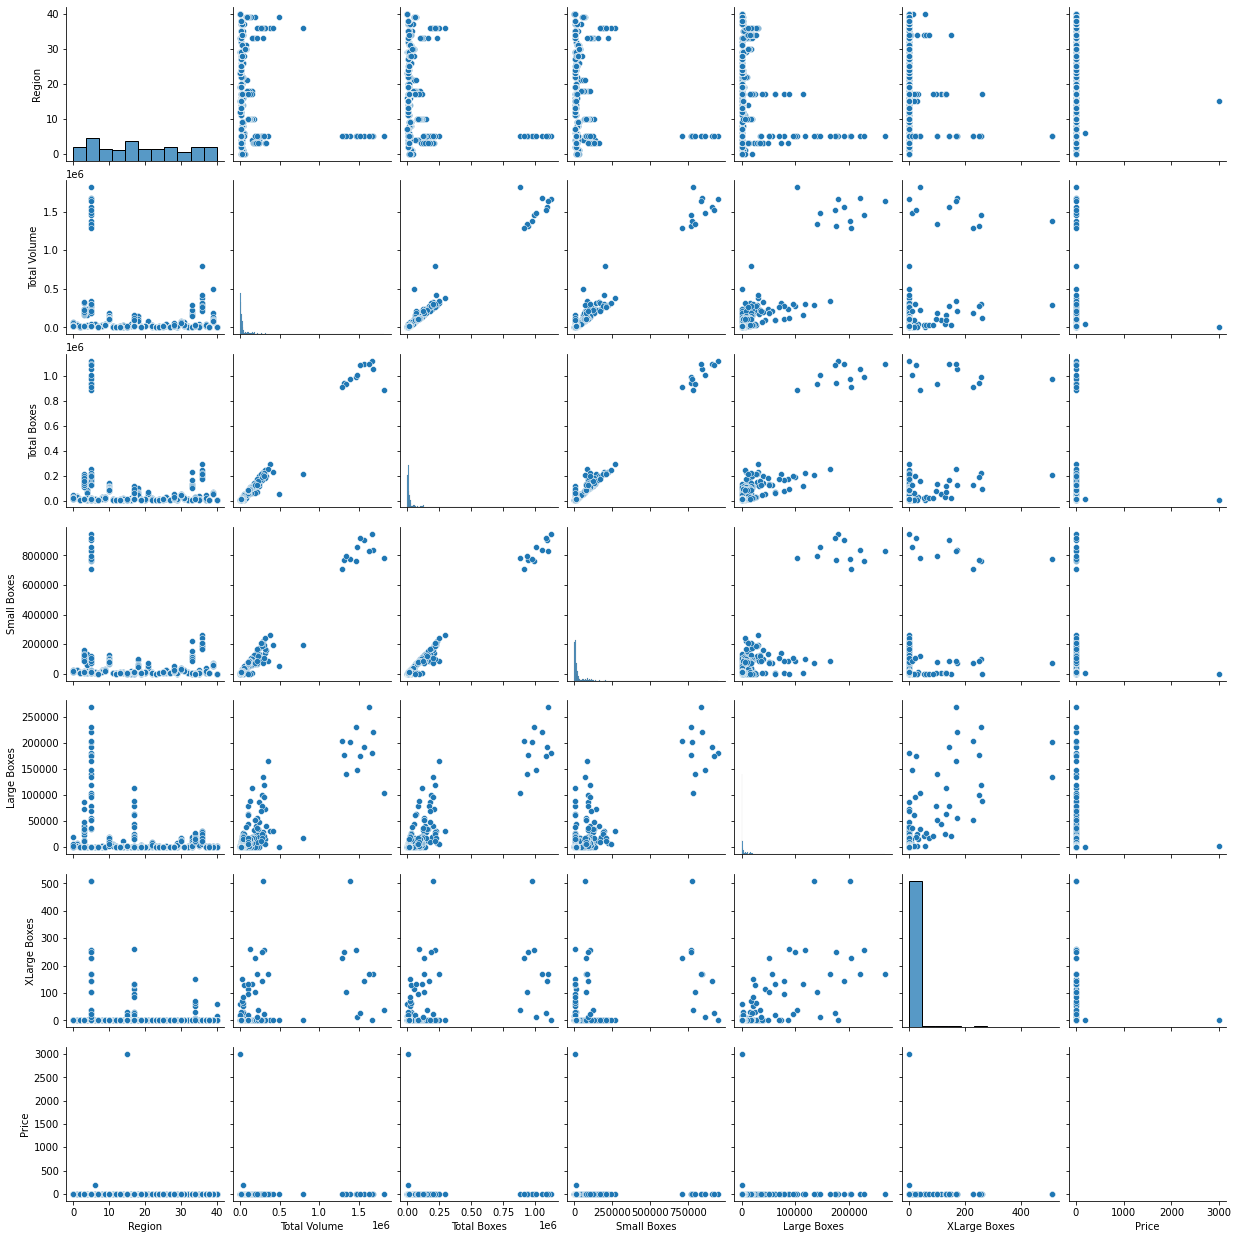

In [14]:
sb.pairplot(data)

## As we have date as a feature, we need to convert them into numerical value. We can do that by using datetime packages.

In [15]:
data['Date'] = data['Date'].map(dt.datetime.toordinal)

In [16]:
data.head()

,Date,Region,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes,Price
0,736778,29,2321.82,2006.46,1996.46,10.00,0.0,1.71
1,736771,29,3154.45,2580.60,2577.27,3.33,0.0,1.66
2,736764,29,2570.52,2209.29,2209.29,0.00,0.0,1.68
3,736757,29,3851.30,3242.98,3239.65,3.33,0.0,1.48
4,736750,29,5356.63,4007.48,4007.48,0.00,0.0,1.56


In [17]:
data.to_csv('kimchi_new_data.csv')

<AxesSubplot:>

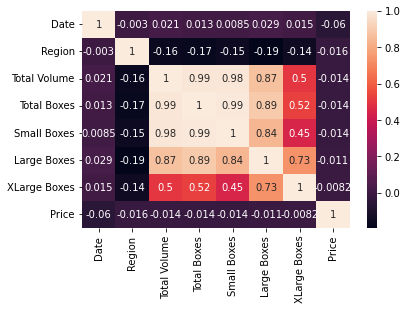

In [18]:
sb.heatmap(data.corr(), annot = True)

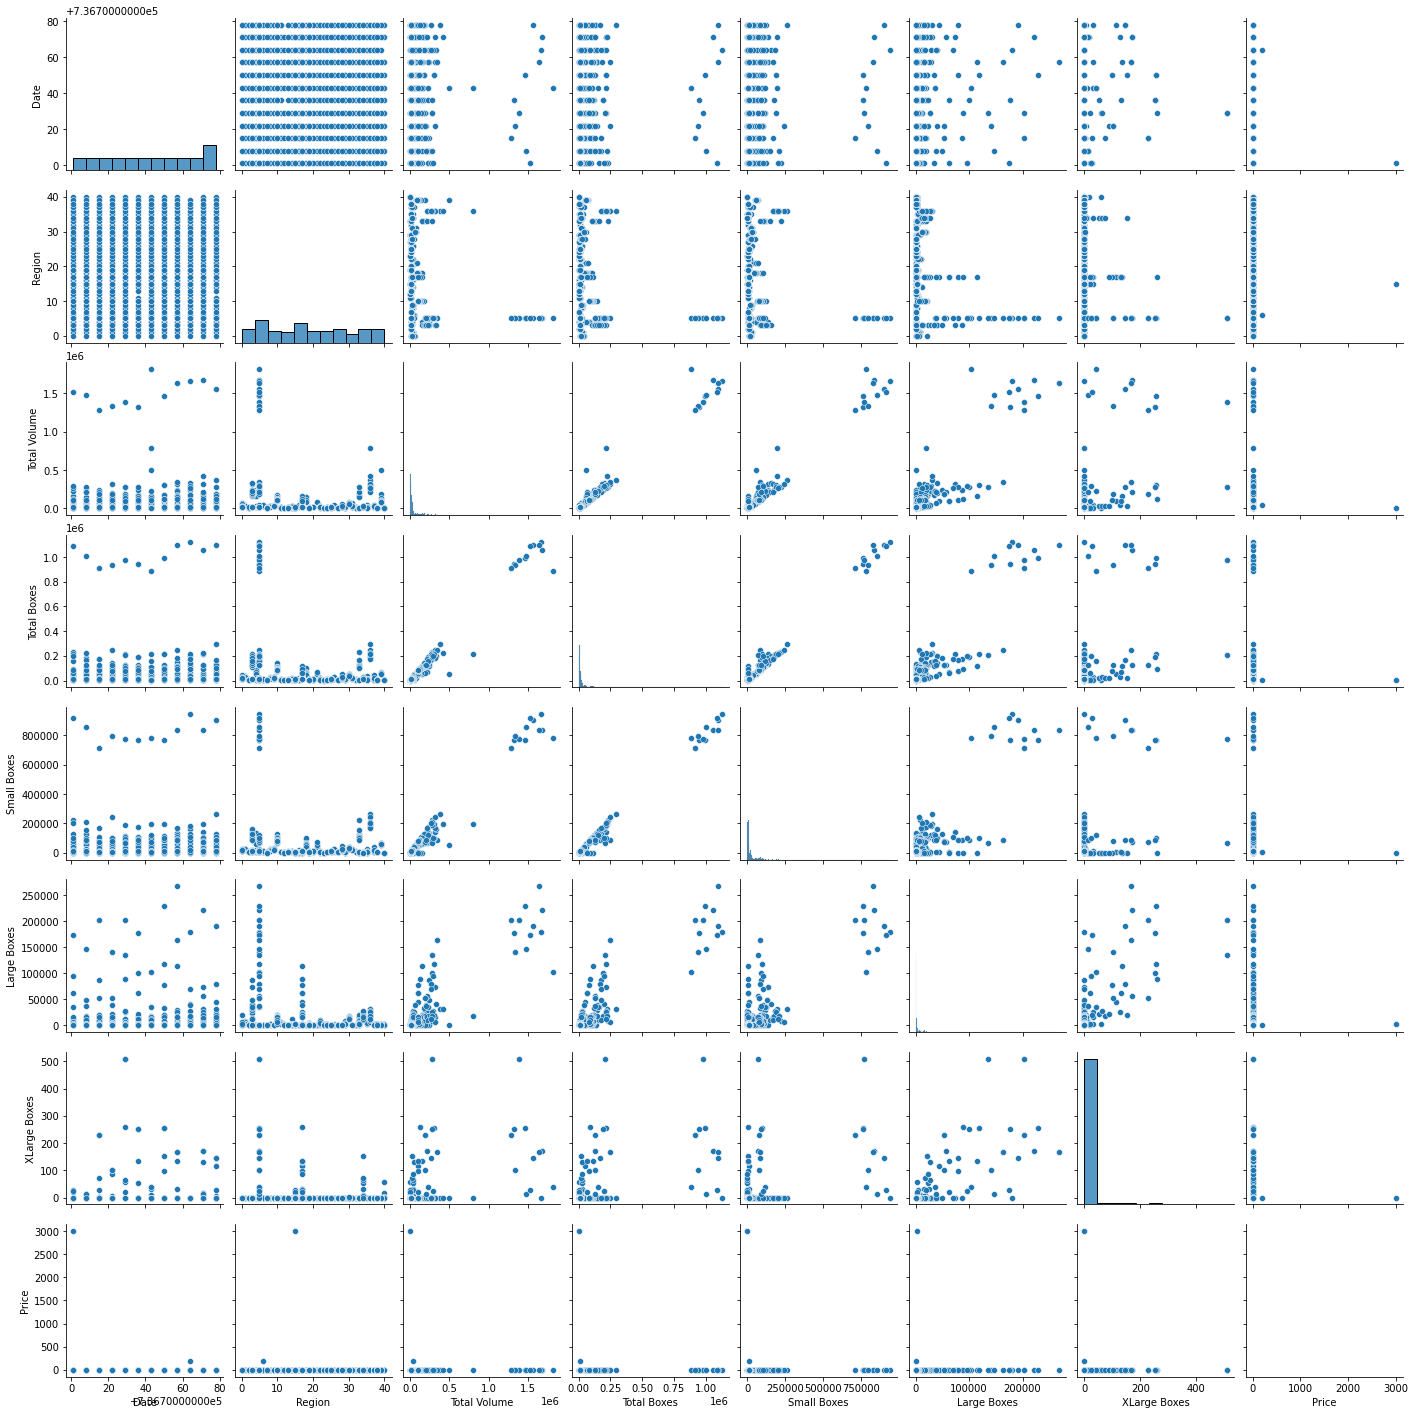

In [19]:
sb.pairplot(data)

## Comment¶
Now, it seems like a classic regression problem where Y is Price and rest of the features are X.

So, I am trying to use XgBoost for example because with limited data, these algorithm are proved to work well. NN should be avoided as we can not use data augmentation with ease.

N.B: I am not sure what other things to add as part of the analysis, clearly there is not much relation among most of the features!

In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.8/dist-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [21]:
X = data [['Date', 'Region', 'Total Volume', 'Total Boxes', 'Small Boxes', 'Large Boxes', 'XLarge Boxes']]
y = data ['Price']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
X_train

,Date,Region,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes
185,736743,3,157146.89,108112.62,98871.98,9240.64,0.00
521,736743,17,40425.93,26505.86,11523.90,14950.62,31.34
179,736701,2,11449.30,8423.53,8423.53,0.00,0.00
261,736715,13,7491.53,5115.15,5115.15,0.00,0.00
154,736708,26,36501.82,27213.19,25789.59,1423.60,0.00
...,...,...,...,...,...,...,...
72,736778,4,190257.38,89631.19,89424.11,207.08,0.00
107,736701,6,41573.25,11854.05,11850.72,3.33,0.00
272,736722,18,97026.15,60603.68,60596.54,7.14,0.00
437,736743,34,20608.98,13690.38,3448.31,10232.51,9.56


In [24]:
X_test

,Date,Region,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes
634,736708,5,207999.67,126261.89,89115.78,37133.99,12.12
595,736729,19,6294.16,6056.85,2847.48,3209.37,0.00
602,736764,19,8115.07,7621.55,7494.08,127.47,0.00
293,736743,32,9673.24,8762.49,7794.44,968.05,0.00
73,736771,4,202790.74,102870.50,102717.50,153.00,0.00
...,...,...,...,...,...,...,...
94,736708,4,19522.15,12129.51,12116.18,13.33,0.00
262,736708,13,9883.94,6186.81,6180.41,6.40,0.00
416,736722,25,13137.18,11867.69,11867.69,0.00,0.00
590,736764,19,4685.01,4455.05,775.90,3679.15,0.00


In [25]:
# define modely_test
model = XGBRegressor()

In [26]:
# fit model
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [27]:
accuracy = model.score(X_test, y_test)

In [28]:
print(accuracy)

0.6517603760892348


In [59]:
# evaluate an xgboost regression model on the kimchi dataset
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 0.105 (0.020)


In [29]:
X_test

,Date,Region,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes
634,736708,5,207999.67,126261.89,89115.78,37133.99,12.12
595,736729,19,6294.16,6056.85,2847.48,3209.37,0.00
602,736764,19,8115.07,7621.55,7494.08,127.47,0.00
293,736743,32,9673.24,8762.49,7794.44,968.05,0.00
73,736771,4,202790.74,102870.50,102717.50,153.00,0.00
...,...,...,...,...,...,...,...
94,736708,4,19522.15,12129.51,12116.18,13.33,0.00
262,736708,13,9883.94,6186.81,6180.41,6.40,0.00
416,736722,25,13137.18,11867.69,11867.69,0.00,0.00
590,736764,19,4685.01,4455.05,775.90,3679.15,0.00


In [30]:
y_test

634    1.82
595    1.22
602    1.31
293    1.52
73     1.75
       ... 
94     1.45
262    1.98
416    1.38
590    1.25
28     1.47
Name: Price, Length: 213, dtype: float64

In [31]:
#Sample Prediction Example

from numpy import asarray

# define new data
row = [736771, 4, 202790.74, 102870.50, 102717.50, 153.00, 0.00]
new_data = asarray([row])
# make a prediction
y_predict = model.predict(new_data)
# summarize prediction
print('The Actual value was 1.75 and our Predicted: %.2f' % y_predict)

The Actual value was 1.75 and our Predicted: 1.68


/usr/local/lib/python3.8/dist-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


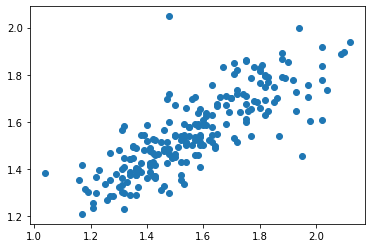

In [32]:
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

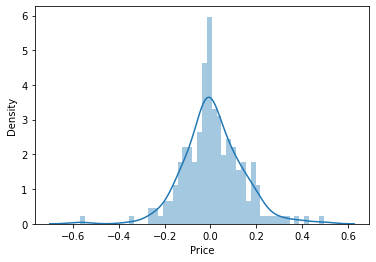

In [33]:
sb.distplot((y_test-predictions), bins= 50)

In [34]:
mse = mean_squared_error(y_test, predictions)


print (mse)
rmse = math.sqrt(mse)
print (rmse)

0.016784373089895346
0.129554517828964


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

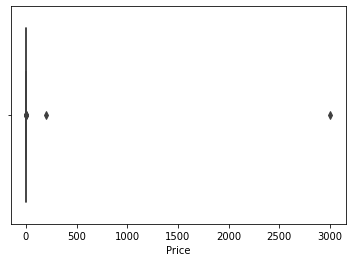

In [35]:
sb.boxplot(data.Price)

## Explore samples that are above 99.70% percentile and below 1% percentile rank on Price

In [36]:
min_thresold, max_thresold = data.Price.quantile([0.001, 0.997])
min_thresold, max_thresold

(1.01643, 16.265700000005186)

In [37]:
data[data.Price < min_thresold]

,Date,Region,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes,Price
171,736757,2,17987.77,10144.07,10144.07,0.0,0.0,1.01


In [38]:
data[data.Price > max_thresold]

,Date,Region,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes,Price
98,736764,6,41969.83,9003.70,8990.36,13.34,0.0,199.0
575,736701,15,3788.91,2162.34,600.00,1562.34,0.0,3003.0


## Remove outliers

In [39]:
new_data = data[(data.Price<max_thresold) & (data.Price>min_thresold)]
new_data.shape

(641, 8)

In [40]:
X = new_data [['Date', 'Region', 'Total Volume', 'Total Boxes', 'Small Boxes', 'Large Boxes', 'XLarge Boxes']]
y = new_data ['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
# define modely_test
new_model = XGBRegressor()

In [42]:
# fit model
new_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [43]:
accuracy = new_model.score(X_test, y_test)

print(accuracy)

0.6583095701585304


/usr/local/lib/python3.8/dist-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


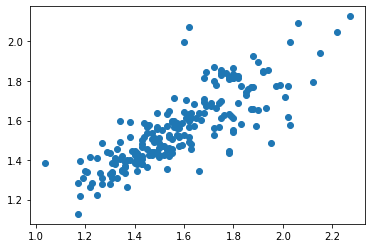

In [44]:
predictions = new_model.predict(X_test)
plt.scatter(y_test, predictions)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

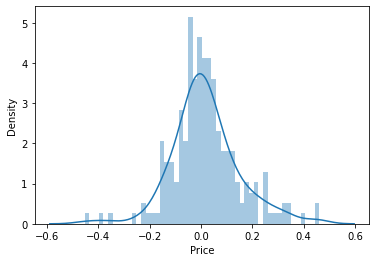

In [45]:
sb.distplot((y_test-predictions), bins= 50)

In [46]:
mse = mean_squared_error(y_test, predictions)

print (mse)
rmse = math.sqrt(mse)
print (rmse)

0.017686812455580462
0.13299177589452837


## Lets choose another feature named 'Total volume' as it has too many outliers too

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Volume'>

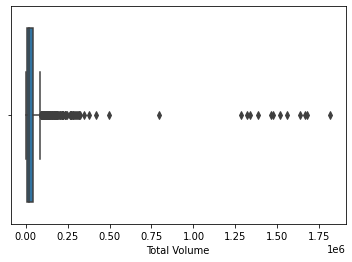

In [47]:
sb.boxplot(data['Total Volume'])

## Explore samples that are above 75.00% percentile and below 25% percentile rank on Total Volume

In [48]:
min_thresold, max_thresold = data['Total Volume'].quantile([0.250, 0.750])
min_thresold, max_thresold

(9181.025, 41583.8525)

In [49]:
data[data['Total Volume'] < min_thresold]

,Date,Region,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes,Price
0,736778,29,2321.82,2006.46,1996.46,10.00,0.0,1.71
1,736771,29,3154.45,2580.60,2577.27,3.33,0.0,1.66
2,736764,29,2570.52,2209.29,2209.29,0.00,0.0,1.68
3,736757,29,3851.30,3242.98,3239.65,3.33,0.0,1.48
4,736750,29,5356.63,4007.48,4007.48,0.00,0.0,1.56
...,...,...,...,...,...,...,...,...
607,736729,19,7363.56,6833.66,6827.78,5.88,0.0,1.32
608,736722,19,7695.89,6680.68,5567.39,1113.29,0.0,1.61
609,736715,19,6871.05,6387.30,6375.55,11.75,0.0,1.52
610,736708,19,7238.04,6634.45,6634.45,0.00,0.0,1.53


In [50]:
data[data['Total Volume'] > max_thresold]

,Date,Region,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes,Price
24,736778,21,57606.42,49973.16,49957.61,15.55,0.00,1.33
25,736771,21,45505.00,37165.89,37157.40,8.49,0.00,1.41
26,736764,21,48044.77,39187.43,39177.43,10.00,0.00,1.44
27,736757,21,43300.77,34475.37,34475.37,0.00,0.00,1.43
28,736750,21,47421.15,37832.13,37822.13,10.00,0.00,1.47
...,...,...,...,...,...,...,...,...
631,736729,5,283378.47,205409.91,70232.59,134666.91,510.41,1.41
632,736722,5,185974.53,129911.47,77822.23,51986.86,102.38,1.80
633,736715,5,189317.99,128267.76,76091.99,51947.50,228.27,1.83
634,736708,5,207999.67,126261.89,89115.78,37133.99,12.12,1.82


In [51]:
new_data_1 = new_data[(new_data['Total Volume']<max_thresold) & (new_data['Total Volume']>min_thresold)]
new_data_1.shape

(321, 8)

In [52]:
X = new_data_1 [['Date', 'Region', 'Total Volume', 'Total Boxes', 'Small Boxes', 'Large Boxes', 'XLarge Boxes']]
y = new_data_1 ['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
# define modely_test
new_model_1 = XGBRegressor()

In [54]:
# fit model
new_model_1.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [55]:
accuracy = new_model_1.score(X_test, y_test)

print(accuracy)

0.5482597017977567


/usr/local/lib/python3.8/dist-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


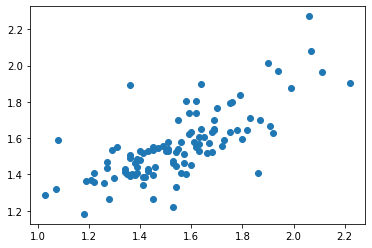

In [56]:
predictions = new_model_1.predict(X_test)
plt.scatter(y_test, predictions)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

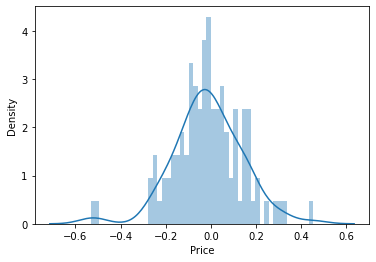

In [57]:
sb.distplot((y_test-predictions), bins= 50)

In [58]:
mse = mean_squared_error(y_test, predictions)

print (mse)
rmse = math.sqrt(mse)
print (rmse)

0.023349183936552137
0.15280439763485912
